# Skin Disease Detection

In [1]:
# from io import IncrementalNewlineDecoder
import numpy as np
#   drawing 
import matplotlib.pyplot as plt

#   dealing with pathes in operating system
import os

#   dealing with images
import cv2

#
# from tqdm import tqdm

#   the base of creating NN
import tensorflow as tf
from tensorflow import keras

#   function that splits the dataset into training and testing
from sklearn.model_selection import train_test_split

#   for getting images for predections
from tensorflow.keras.preprocessing.image import load_img

#   for dealing with dataframes
import pandas as pd

#   for dealing with images
from PIL import Image

#   for converting the output into array that can read by the CNN
from keras.utils import to_categorical

#   for bulding the CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DATAIR = '/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES'

CATEGORIES = ["1. Eczema 1677", "2. Melanoma 15.75k", "3. Atopic Dermatitis - 1.25k",
              "4. Basal Cell Carcinoma (BCC) 3323", "5. Melanocytic Nevi (NV) - 7970",
              "6. Benign Keratosis-like Lesions (BKL) 2624",
              "7. Psoriasis pictures Lichen Planus and related diseases - 2k",
              "8. Seborrheic Keratoses and other Benign Tumors - 1.8k",
              "9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k",
              "10. Warts Molluscum and other Viral Infections - 2103"]

IMG_SIZE=100

In [3]:
all_data= []

for category in CATEGORIES:
    print(category) # wanting to know where is the reading
    path = os.path.join(DATAIR, category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        all_data.append([img_array, class_num])

print(len(all_data))

1. Eczema 1677
2. Melanoma 15.75k
3. Atopic Dermatitis - 1.25k
4. Basal Cell Carcinoma (BCC) 3323
5. Melanocytic Nevi (NV) - 7970
6. Benign Keratosis-like Lesions (BKL) 2624
7. Psoriasis pictures Lichen Planus and related diseases - 2k
8. Seborrheic Keratoses and other Benign Tumors - 1.8k
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k
10. Warts Molluscum and other Viral Infections - 2103
27153


# View image form the Data

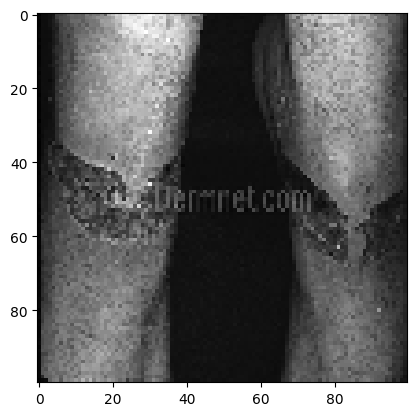

In [4]:
plt.imshow(all_data[0][0], cmap='gray')
plt.show()

In [5]:
all_data[0][0].shape

(100, 100)

# Preparing for the Training

## Randomize The Data 

In [6]:
import random
random.shuffle(all_data)

In [7]:
for x in all_data[:10]:
    print(x[1])

2
3
6
5
3
7
4
1
6
5


## Splitting The Data for Input as x and Output as y

In [8]:
x = []
y = []

for xTemp, yTemp in all_data:
    x.append(xTemp)
    y.append(yTemp)

x = np.array(x)
y = np.array(y)

del all_data # delete array "all_data" for saving RAM

In [9]:
type(y)

numpy.ndarray

In [10]:
y[0]

2

## Noramlizing The images

In [11]:
x = keras.utils.normalize(x, axis=1)

In [12]:
x[0].shape

(100, 100)

## Convert ground truth labels to one-hot encoding

In [13]:
y = to_categorical(y)

In [14]:
type(y)

numpy.ndarray

## Splitting The Data for Training and Testing (80% - 20%)

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

del x, y # delete "x, y" arrays for saving RAM

In [16]:
xTrain.shape

(21722, 100, 100)

# Build & Train CNN

In [17]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
fitting = model.fit(xTrain, yTrain, epochs=10, validation_data=(xTest, yTest))

Epoch 1/10
679/679 [==============================] - 194s 285ms/step - loss: 1.5149 - accuracy: 0.4428 - val_loss: 1.3521 - val_accuracy: 0.4903
Epoch 2/10
679/679 [==============================] - 205s 302ms/step - loss: 1.2661 - accuracy: 0.5186 - val_loss: 1.2575 - val_accuracy: 0.5146
Epoch 3/10
679/679 [==============================] - 214s 315ms/step - loss: 1.1880 - accuracy: 0.5444 - val_loss: 1.2300 - val_accuracy: 0.5266
Epoch 4/10
679/679 [==============================] - 203s 300ms/step - loss: 1.1266 - accuracy: 0.5712 - val_loss: 1.1831 - val_accuracy: 0.5380
Epoch 5/10
679/679 [==============================] - 199s 293ms/step - loss: 1.0680 - accuracy: 0.5928 - val_loss: 1.1099 - val_accuracy: 0.5719
Epoch 6/10
679/679 [==============================] - 203s 299ms/step - loss: 0.9938 - accuracy: 0.6224 - val_loss: 1.1670 - val_accuracy: 0.5660
Epoch 7/10
679/679 [==============================] - 194s 286ms/step - loss: 0.9301 - accuracy: 0.6469 - val_loss: 1.1321 -

In [20]:
print('Train accuracy:', fitting.history['accuracy'][-1])
print('Test accuracy:', fitting.history["val_accuracy"][-1])

Train accuracy: 0.7490102052688599
Test accuracy: 0.5842386484146118


# View in Graphes

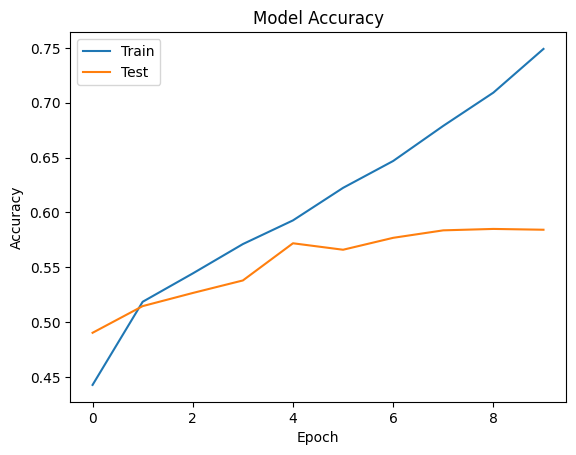

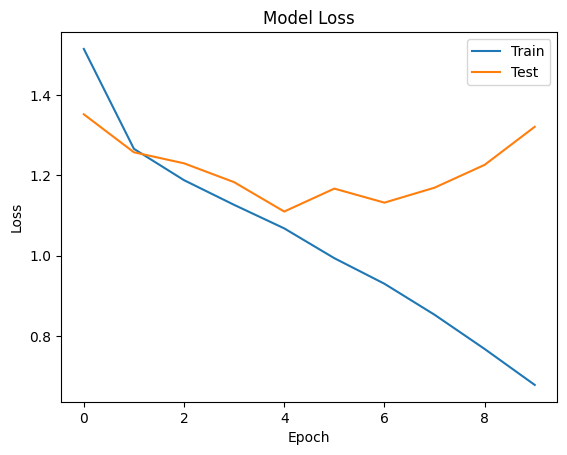

In [21]:
def view(history):
    # Plot the training accuracy and loss over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

view(fitting)

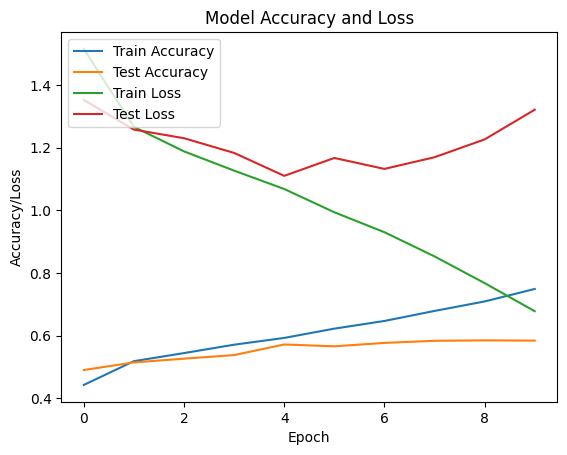

In [22]:
def way2(history):
    # Plot the training and testing accuracy and loss over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'], loc='upper left')
    plt.show()

way2(fitting)

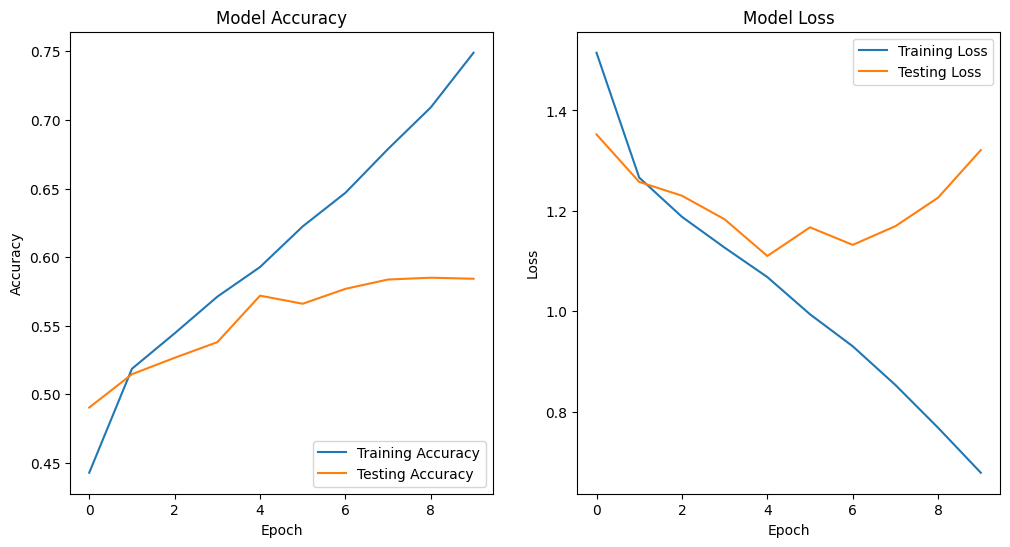

In [23]:
def way3(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Testing Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='lower right')

    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Testing Loss')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')

    plt.show()

way3(fitting)


# Save model for Further Use

In [24]:
model.save('skin_disease_model.h5')

# Predicting new images not in the dataset

In [25]:
new_eczema_raw_image = r"D:\Studies\Third Year, Second Term\Projects\NN\Prediction\Eczema.jpg"

new_eczema_raw_image = r"D:\Studies\Third Year, Second Term\Projects\NN\Prediction\Eczema.jpg"

new_eczema_raw_image = r"D:\Studies\Third Year, Second Term\Projects\NN\Prediction\Eczema.jpg"

new_eczema_raw_image = r"D:\Studies\Third Year, Second Term\Projects\NN\Prediction\Eczema.jpg"

In [26]:
def predict_new_image(img):

    new_image = load_img(img, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')

    new_image = keras.utils.normalize(new_image, axis=1)

    new_image = np.array(new_image).reshape(-1, IMG_SIZE, IMG_SIZE)

    prediction = model.predict(new_image)

    return prediction

In [27]:
predicted_class = predict_new_image(new_eczema_raw_image)

predicted_class = CATEGORIES[predicted_class]

#   preview the photo and its label
from IPython.display import Image

Image(filename= new_eczema_raw_image)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Studies\\Third Year, Second Term\\Projects\\NN\\Prediction\\Eczema.jpg'

# Transfare Learning

## Zidan

In [ ]:
# Load the saved pre-trained model
base_model = load_model('zidan_pretrained_model.h5')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the new layers on the new dataset
model.fit(train_images, train_labels, epochs=10)

# Save the transfer learning model as a .h5 file
model.save('zidan_transfer_learning_model.h5')